# Como treinar o ChatGPT com seus dados

### Objetivo

Aproveitar do conteúdo já disponível no site da empresa para criar um assistente que possa responder questionamentos dos usuários e clientes.

### Como

Extração de dados textuais de um site através de web scrapping.

Utilizando os texto do site vamos utilizar de embeddings para extrair o significado das palavras em um texto através da similaridade semântica.

O embedding será utilizado como contexto para criar um Conhecimento Customizado ou Custom Knowledge ao "ChatGPT". Assim, o assistente irá responder perguntas com base no conhecimento específico que foi disponibilizado ao assistente.

Disponibilizar uma interface onde o usuário pode fazer os questionamentos de forma simples

### Primeiros passos

Criar uma conta em:

https://platform.openai.com/

Criar uma nova API key em :

https://platform.openai.com/account/api-keys

Anotar essa chave gerada em algum lugar, ao fechar a janelas você não irá ter mais acesso, a menos que crie uma chave nova

### Pacotes necessários

In [24]:
# Gerais
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


# Scraping
from bs4 import BeautifulSoup
from collections import deque
from html.parser import HTMLParser
from urllib.parse import urlparse
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from urllib.request import Request, urlopen

# Interface
import gradio as gr

# Assistente
import tiktoken
import openai
import time
from openai.embeddings_utils import distances_from_embeddings, cosine_similarity

### Web Scrapping

In [25]:
urls = ['https://bixtecnologia.com.br/','https://bixtecnologia.com.br/sobre-nos/','https://bixtecnologia.com.br/engenharia-de-dados/',
        'https://bixtecnologia.com.br/business-intelligence/','https://bixtecnologia.com.br/ciencia-de-dados/',
        'https://bixtecnologia.com.br/sistemas/','https://bixtecnologia.com.br/transformacao-digital/',
        'https://bixtecnologia.com.br/cursos-e-treinamentos/','https://bixtecnologia.com.br/licencas/',
        'https://bixtecnologia.com.br/google-cloud/','https://bixtecnologia.com.br/databricks/',
        'https://bixtecnologia.com.br/qliksense/', 'https://bixtecnologia.com.br/powerbi/','https://bixtecnologia.com.br/python/',
        'https://bixtecnologia.com.br/trabalhe-conosco/','https://bixtecnologia.gupy.io/','https://bixtecnologia.com.br/blog/',
        'https://www.semanadedados.com/','https://bixtecnologia.com.br/contato/']
domain = "bixtecnologia.com.br"

url = "https://bixtecnologia.com.br/"

*- Explicando o código*

*A função get_text_from_url realiza o scraping do texto a partir da URL passada a função. é criado uma pasta com o nome do domínio e o texto extraido da URL é armazenado nessa pasta no formato txt.* 

*Uma fila é utilizada para armazenar URLs a serem processadas. Enquanto a fila não estiver vazia, a função retira a próxima URL da fila, abre um navegador web usando o driver do Chrome, acessa a página da URL e extrai o texto utilizando a biblioteca BeautifulSoup. O texto extraído é salvo em um arquivo de texto.*

In [3]:
def get_text_from_url(url):
    '''
        Essa função recebe uma url e faz o scraping do texto da página
        Retorna o texto da página e salva o texto em um arquivo <url>.txt
    '''
    
    # Analisa a URL e pega o domínio
    local_domain = urlparse(url).netloc
    print(local_domain)

    # Fila para armazenar as urls para fazer o scraping
    fila = deque(urls)
    print(fila)

    # Criar um diretório para armazenar os arquivos de texto
    if not os.path.exists("text/"):
            os.mkdir("text/")

    if not os.path.exists("text/"+local_domain+"/"):
            os.mkdir("text/" + local_domain + "/")

    # Create a directory to store the csv files
    if not os.path.exists("processed"):
            os.mkdir("processed")

    # Enquanto a fila não estiver vazia, continue fazendo o scraping
    while fila:
        # Pega a próxima URL da fila
        url = fila.pop()
        print("Próxima url",url) # Checa próxima url

        # Salva o texto da url em um arquivo <url>.txt
        with open('text/'+local_domain+'/'+url[8:].replace("/", "_") + ".txt", "w") as f:
            driver = Chrome()
            driver.get(url)
            page_soup = BeautifulSoup(driver.page_source, 'html.parser')
            text = page_soup.get_text()
            f.write(text)

        driver.close()
get_text_from_url(url)


bixtecnologia.com.br
deque(['https://bixtecnologia.com.br/', 'https://bixtecnologia.com.br/sobre-nos/', 'https://bixtecnologia.com.br/engenharia-de-dados/', 'https://bixtecnologia.com.br/business-intelligence/', 'https://bixtecnologia.com.br/ciencia-de-dados/', 'https://bixtecnologia.com.br/sistemas/', 'https://bixtecnologia.com.br/transformacao-digital/', 'https://bixtecnologia.com.br/cursos-e-treinamentos/', 'https://bixtecnologia.com.br/licencas/', 'https://bixtecnologia.com.br/google-cloud/', 'https://bixtecnologia.com.br/databricks/', 'https://bixtecnologia.com.br/qliksense/', 'https://bixtecnologia.com.br/powerbi/', 'https://bixtecnologia.com.br/python/', 'https://bixtecnologia.com.br/trabalhe-conosco/', 'https://bixtecnologia.gupy.io/', 'https://bixtecnologia.com.br/blog/', 'https://www.semanadedados.com/', 'https://bixtecnologia.com.br/contato/'])
Próxima url https://bixtecnologia.com.br/contato/


Error getting version of chromedriver 115. Retrying with chromedriver 114 (attempt 1/5)


Próxima url https://www.semanadedados.com/
Próxima url https://bixtecnologia.com.br/blog/
Próxima url https://bixtecnologia.gupy.io/
Próxima url https://bixtecnologia.com.br/trabalhe-conosco/
Próxima url https://bixtecnologia.com.br/python/
Próxima url https://bixtecnologia.com.br/powerbi/
Próxima url https://bixtecnologia.com.br/qliksense/
Próxima url https://bixtecnologia.com.br/databricks/
Próxima url https://bixtecnologia.com.br/google-cloud/
Próxima url https://bixtecnologia.com.br/licencas/
Próxima url https://bixtecnologia.com.br/cursos-e-treinamentos/
Próxima url https://bixtecnologia.com.br/transformacao-digital/
Próxima url https://bixtecnologia.com.br/sistemas/
Próxima url https://bixtecnologia.com.br/ciencia-de-dados/
Próxima url https://bixtecnologia.com.br/business-intelligence/
Próxima url https://bixtecnologia.com.br/engenharia-de-dados/
Próxima url https://bixtecnologia.com.br/sobre-nos/
Próxima url https://bixtecnologia.com.br/


### Pré processamento dos textos

In [26]:
def remove_newlines(serie):
    '''
        Essa função recebe uma série e remove as quebras de linha
    '''
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    return serie

*- Explicando o código*

*Neste trecho de código uma lista criada, todos os arquivos de texto presentes no diretório criado previamente são percorridos. Para cada arquivo, ele lê o conteúdo e realiza algumas manipulações no texto, como a remoção de determinadas palavras ou caracteres específicos.*

*Em seguida, os textos processados são adicionados na lista texts. Em seguida, a lista texts é usada para criar um DataFrame com duas colunas: 'page_name' (que contém o nome do arquivo) e 'text' (que contém o texto processado). Por fim, o DataFrame é salvo em um arquivo CSV chamado 'scraped.csv' no diretório 'processed'.*

In [27]:
# Criar uma lista para armazenar os arquivos de texto
texts=[]
# Obter todos os arquivos de texto no diretório de texto
for file in os.listdir("text/" + domain + "/"):
    # Abra o arquivo e leia o texto
    with open("text/" + domain + "/" + file, "r") as f:
        text = f.read()
        # Omita as primeiras 20 linhas e as últimas 4 linhas e, em seguida, substitua  -, _, e #update com espaços.
        texts.append((file[20:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))

#Criar um Dataframe a partir da lista de textos
df = pd.DataFrame(texts, columns = ['page_name', 'text'])

# Defina a coluna de texto para ser o texto bruto com as novas linhas removidas
df['text'] = df.page_name + ". " + remove_newlines(df.text)
df.to_csv('processed/scraped.csv')
df.head()

C:\Users\nicol\AppData\Local\Temp\ipykernel_11684\2116715963.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


,page_name,text
0,,. BIX Tecnologia | Consultoria de Dados | B...
1,blog,blog . Blog | BIX Tecnologia ...
2,business intelligence,business intelligence . Business Intelligen...
3,ciencia de dados,ciencia de dados . Ciência de Dados | BIX T...
4,contato,contato . Contato | BIX Tecnologia ...


In [28]:
print("Checando número de páginas extraidas e urls informadas \n")
print("Número de páginas",df.shape[0])
print("\nNúmero de urls informadas",len(urls))


Checando número de páginas extraidas e urls informadas 

Número de páginas 19

Número de urls informadas 19


### Tokens

A tokenização é a próxima etapa após salvar o texto bruto em um arquivo CSV. Esse processo divide o texto de entrada em tokens, decompondo as frases e palavras. Uma demonstração visual disso pode ser vista em nosso Tokenizer na documentação.

Utilizado a biblioteca tiktoken, recomendada para trabalhar com o modelo "ada-002" da openAI.

*- Explicando o código*

*O código carrega um tokenizer chamado "cl100k_base", que é recomendado para utilizar com o modelo "ada-002". Em seguida, ele lê um arquivo CSV chamado 'scraped.csv' em um DataFrame usando o pandas.*

*Os dados do DataFrame são organizados em duas colunas chamadas 'title' e 'text'. O código, em seguida, tokeniza o texto na coluna 'text' usando o tokenizer carregado e salva a contagem de tokens em uma nova coluna chamada 'n_tokens'.*

*É criado uma visualiação em forma de histograma para visualizar a distribuição do número de tokens por linha do DataFrame, o que pode ser útil para entender melhor o comprimento dos textos contidos na coluna 'text'.*

array([[<AxesSubplot: title={'center': 'n_tokens'}>]], dtype=object)

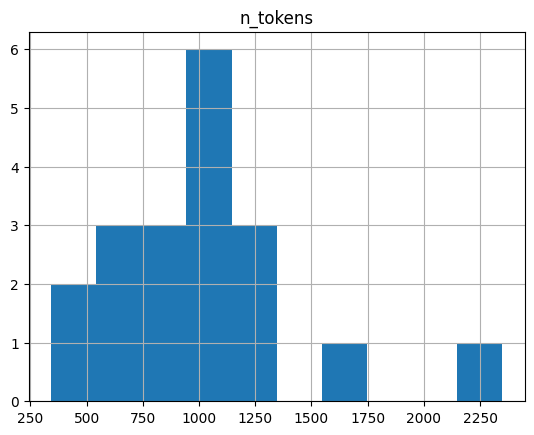

In [29]:
# Carregar o tokenizador cl100k_base que foi projetado para funcionar com o modelo ada-002
tokenizer = tiktoken.get_encoding("cl100k_base")

df = pd.read_csv('processed/scraped.csv', index_col=0)
df.columns = ['title', 'text']

# Tokenize o texto e salve o número de tokens em uma nova coluna
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize a distribuição do número de tokens por linha usando um histograma
df.hist(column='n_tokens')


In [30]:
df.head()

,title,text,n_tokens
0,,. BIX Tecnologia | Consultoria de Dados | B...,984
1,blog,blog . Blog | BIX Tecnologia ...,989
2,business intelligence,business intelligence . Business Intelligen...,1269
3,ciencia de dados,ciencia de dados . Ciência de Dados | BIX T...,1033
4,contato,contato . Contato | BIX Tecnologia ...,458


A API de embedding tem um limite para o número máximo de tokens de entrada. Mesmo não atingindo o limite vamos diminuir a quantidade de tokens que deve ser processado por requisição da API. Para ficar abaixo desse limite, o texto no arquivo CSV precisa ser dividido em partes que contenham o número máximo de tokens definidos.

Como utilizamos uma API gratuíta limitamos o número de tokens bem abaixo do limite máximo

*- Explicando o código*

*Foi definido no código uma função chamada split_into_many, que recebe um texto e o divide em partes de um número máximo de tokens (dado pelo valor de max_tokens).*

*Em seguida, ele percorre um DataFrame chamado df e para cada linha, verifica se o texto contido na coluna 'text' tem um número de tokens maior que o limite máximo. Se for o caso, o texto é dividido em partes menores usando a função split_into_many, e essas partes são adicionadas à lista shortened. Caso contrário, o texto é adicionado diretamente à lista shortened. O objetivo é garantir que nenhum texto tenha mais tokens do que o valor máximo definido, dividindo-o em partes menores, se necessário.*

In [31]:
max_tokens = 500

# Função para dividir o texto em partes de um número máximo de tokens
def split_into_many(text, max_tokens = max_tokens):

    # Dividir o texto em frases
    sentences = text.split('. ')

    # Obter o número de tokens para cada sentença
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]
    
    chunks = []
    tokens_so_far = 0
    chunk = []

    # Percorrer as sentenças e os tokens unidos em uma tupla
    for sentence, token in zip(sentences, n_tokens):

        # Se o número de tokens até o momento mais o número de tokens na frase atual for maior 
        # do que o número máximo de tokens, adicione o bloco à lista de blocos e redefina
        # o bloco e os tokens até o momento
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # Se o número de tokens na frase atual for maior que o número máximo de 
        # tokens, vá para a próxima sentença
        if token > max_tokens:
            continue

        # Caso contrário, adicione a frase ao bloco e adicione o número de tokens ao total
        chunk.append(sentence)
        tokens_so_far += token + 1

    return chunks
    

shortened = []

# Percorrer o dataframe
for row in df.iterrows():

    # Se o texto for None, vá para a próxima linha
    if row[1]['text'] is None:
        continue

    # Se o número de tokens for maior que o número máximo de tokens, divida o texto em partes
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])
    
    # Caso contrário, adicione o texto à lista de textos abreviados
    else:
        shortened.append( row[1]['text'] )

array([[<AxesSubplot: title={'center': 'n_tokens'}>]], dtype=object)

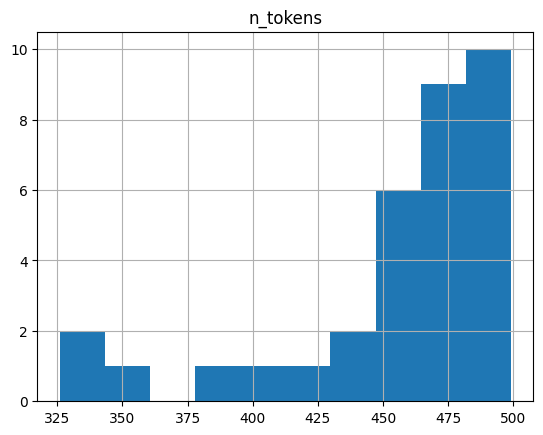

In [32]:
df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
df.hist(column='n_tokens')

In [33]:
num_tot_tokens = df['n_tokens'].sum()
print("Número total de tokens",num_tot_tokens)

Número total de tokens 15034


In [34]:
df.head()

,text,n_tokens
0,. BIX Tecnologia | Consultoria de Dados | B...,476
1,Conte com um time completo para se...,444
2,blog . Blog | BIX Tecnologia ...,326
3,"Nessa edição, Leia mais » Desvendando as dif...",471
4,business intelligence . Business Intelligen...,499


In [35]:
i = 0
for text in df['text']:
    i+=1
    
print("Número de trechos de texto com no máximo",max_tokens,"tokens :",i)

Número de trechos de texto com no máximo 500 tokens : 33


### Embedding

Estamos usando o "text-embedding-ada-002" por conta do preço e bom desempenho.

https://openai.com/blog/new-and-improved-embedding-model

Preço de requisição e uso da API $0.0001 cada 1,000 tokens

Preço de treinamento do embedding

In [36]:
print("Custo total de treinamento do embedding: $",num_tot_tokens /1000 * 0.0001)

Custo total de treinamento do embedding: $ 0.0015034000000000002


*- Explicando o código*

*Cria o embedding para nosso texto e armazenar em um arquivo csv.*
*Os embeddings são armazenados em uma lista chamada embeddings, que é posteriormente adicionada ao DataFrame df em uma nova coluna chamada 'embeddings'. Por fim, o DataFrame modificado é salvo em um arquivo CSV chamado 'embeddings.csv' no diretório 'processed'.*

In [37]:
def read_openai_api_key():
    with open('openai_secret.txt', 'r') as file:
        api_key = file.read().strip()
    return api_key

my_api_key = read_openai_api_key()

Coloque sua chave da API do openAI em "SUA_CHAVE_OPENAI" ou crie um arquivo "openai_secret.txt" e coloque sua chave dentro.

In [38]:
# openai.api_key = "SUA_CHAVE_OPENAI"

openai.api_key = read_openai_api_key()

*- Explicando o código*

*Este código realiza o embedding do texto usando o modelo "text-embedding-ada-002" da OpenAI. Ele itera sobre os textos contidos na coluna 'text' do DataFrame. Para cada texto, há uma pausa de 2 segundos, para evitar problemas de taxa de requisição da API, e, em seguida, tenta obter a incorporação chamando a API do modelo. Se ocorrer um erro de taxa limite (RateLimitError), ele aguarda 20 segundos antes de tentar novamente.* 

*Os embeddings são armazenados em uma lista e, no final, são adicionadas como uma nova coluna no DataFrame. O DataFrame é então salvo em um arquivo CSV chamado 'embeddings.csv'.*

In [20]:
i = 0
embeddings = []
for text in df['text']:
    time.sleep(2)
    print(i)
    try:
        embedding = openai.Embedding.create(input=text, engine='text-embedding-ada-002')['data'][0]['embedding']
        print("Fazendo embedding do texto")
        embeddings.append(embedding)
    except openai.error.RateLimitError:
        print("Rate limit error, esperando 20 segundo antes de tentar novamente")
        time.sleep(20)  
        embedding = openai.Embedding.create(input=text, engine='text-embedding-ada-002')['data'][0]['embedding']
        print("embedding texto depois de esperar 20 segundos")
        embeddings.append(embedding)
    i+=1

df['embeddings'] = embeddings
df.to_csv('processed/embeddings.csv')
df.head()

0
Fazendo embedding do texto
1
Fazendo embedding do texto
2
Fazendo embedding do texto
3
Rate limit error, esperando 20 segundo antes de tentar novamente
embedding texto depois de esperar 20 segundos
4
Rate limit error, esperando 20 segundo antes de tentar novamente
embedding texto depois de esperar 20 segundos
5
Rate limit error, esperando 20 segundo antes de tentar novamente
embedding texto depois de esperar 20 segundos
6
Rate limit error, esperando 20 segundo antes de tentar novamente
embedding texto depois de esperar 20 segundos
7
Rate limit error, esperando 20 segundo antes de tentar novamente
embedding texto depois de esperar 20 segundos
8
Rate limit error, esperando 20 segundo antes de tentar novamente
embedding texto depois de esperar 20 segundos
9
Fazendo embedding do texto
10
Rate limit error, esperando 20 segundo antes de tentar novamente
embedding texto depois de esperar 20 segundos
11
Rate limit error, esperando 20 segundo antes de tentar novamente
embedding texto depois d

,text,n_tokens,embeddings
0,. BIX Tecnologia | Consultoria de Dados | B...,476,"[-0.02229938842356205, 0.0022377429995685816, ..."
1,Conte com um time completo para se...,444,"[-0.007549031171947718, 0.016590233892202377, ..."
2,blog . Blog | BIX Tecnologia ...,326,"[-0.013212625868618488, 0.0003394204832147807,..."
3,"Nessa edição, Leia mais » Desvendando as dif...",471,"[-0.01131491269916296, 0.008576784282922745, 0..."
4,business intelligence . Business Intelligen...,499,"[-0.024078745394945145, 0.0018577823648229241,..."


*- Explicando o código*

*O código o arquivo CSV 'embeddings.csv' em um DataFrame. Em seguida, ele converte a coluna 'embeddings', que contém representações de texto em formato de string, para arrays NumPy. Para isso, a função eval é aplicada para transformar as strings em objetos Python, e em seguida, a função np.array é aplicada para convertê-las em arrays NumPy. Por fim, o código imprime as cinco primeiras linhas do DataFrame.*

In [39]:
df=pd.read_csv('processed/embeddings.csv', index_col=0)
df['embeddings'] = df['embeddings'].apply(eval).apply(np.array)

df.head()

,text,n_tokens,embeddings
0,. BIX Tecnologia | Consultoria de Dados | B...,476,"[-0.02229938842356205, 0.0022377429995685816, ..."
1,Conte com um time completo para se...,444,"[-0.007549031171947718, 0.016590233892202377, ..."
2,blog . Blog | BIX Tecnologia ...,326,"[-0.013212625868618488, 0.0003394204832147807,..."
3,"Nessa edição, Leia mais » Desvendando as dif...",471,"[-0.01131491269916296, 0.008576784282922745, 0..."
4,business intelligence . Business Intelligen...,499,"[-0.024078745394945145, 0.0018577823648229241,..."


*- Explicando o código*

*A função chamada create_context, cria um contexto para uma pergunta específica usando uma estratégia de busca no DataFrame fornecido. A função recebe a pergunta, o DataFrame contendo os textos e os embeddings, e um comprimento máximo permitido. Primeiro, a função obtém os embeddings para a pergunta usando o modelo 'text-embedding-ada-002' da OpenAI. Em seguida, calcula as distâncias dos embeddings da pergunta em relação aos embeddings presentes no DataFrame. Em seguida, classifica o DataFrame com base nas distâncias e adiciona os textos ao contexto até que o tamanho máximo do contexto (em número de tokens) seja atingido. O contexto é retornado como uma string.

In [40]:
def create_context(question, df, max_len=1800, size="ada"):
    """
    Cria um contexto para uma pergunta encontrando o contexto mais similar no conjunto de embeddings gerado utilizando o Custom Knowledge.
    """

    # Obter a embeddings para a pergunta que foi feita
    q_embeddings = openai.Embedding.create(input=question, engine='text-embedding-ada-002')['data'][0]['embedding']

    # Obter as distâncias a partir dos embeddings
    df['distances'] = distances_from_embeddings(q_embeddings, df['embeddings'].values, distance_metric='cosine')


    returns = []
    cur_len = 0

    # Classifique por distância e adicione o texto ao contexto
    for i, row in df.sort_values('distances', ascending=True).iterrows():
        
        # Adicionar o comprimento do texto ao comprimento atual
        cur_len += row['n_tokens'] + 4
        
        # Se o contexto for muito longo, quebre
        if cur_len > max_len:
            break
        
        # Caso contrário, adicione-o ao texto que está sendo retornado
        returns.append(row["text"])

    # Retornar o contexto
    return "\n\n###\n\n".join(returns)


*- Explicando o código*

*A função answer_question que recebe alguns parâmetros, como um DataFrame, um modelo de linguagem do OpenAI especificado pelo nome model, uma pergunta de entrada, um comprimento máximo para o contexto, um tamanho para o modelo, entre outros.*

*A função cria um contexto relevante para a pergunta usando a função create_context, explicada previamente, e, em seguida, envia a pergunta e o contexto para a API do OpenAI para obter uma resposta usando a função openai.Completion.create(). A resposta obtida é retornada, mas se ocorrer algum erro durante a chamada da API, o código imprime o erro e não retorna nada.*

*Se a pergunta realizada pelo usuário não estiver dentro do contexto passado a API ou do Conhecimento Customizado, na qual, a API foi adequada, o Assistente deve responder "Eu não sei responder isso"*

In [41]:
def answer_question(
                    df=df,
                    model="text-davinci-003",
                    question="O que é a bix tecnologia?",
                    max_len=1800,
                    size="ada",
                    debug=False,
                    max_tokens=150,
                    stop_sequence=None):
    """
    Responder a uma pergunta com base no contexto mais semelhante dos textos do dataframe
    """
    context = create_context(
        question,
        df=df,
        max_len=max_len,
        size=size,
    )
    if debug:
        print("Context:\n" + context)
        print("\n\n")

    try:
        # Criar uma conclusão usando a pergunta e o contexto
        response = openai.Completion.create(
            prompt=f"Responda as perguntas com base no contexto abaixo, e se a pergunta não puder ser respondida diga \"Eu não sei responder isso\"\n\Contexto: {context}\n\n---\n\nPergunta: {question}\nResposta:",
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            model=model,
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
    #     retornar ""

#### Exemplos de questionamentos

"Quero fazer um projeto de previsão utilizando dados históricos, vocês conseguem me ajudar?"


In [16]:
answer_question(question="O que é bix tecnologia?", debug=False)

'BIX Tecnologia é uma consultoria de dados com foco em negócios e na conquista de resultados. Utilizamos as principais ferramentas e tecnologias do mercado no desenvolvimento de projetos que ajudam os nossos clientes a extrair o máximo de valor de seus dados e se transformar digitalmente.'

In [ ]:
answer_question(df, question="Quero prever o dia de amanha, voces podem me ajudar?")

'Eu não sei responder isso.'

In [42]:
answer_question(df, question="Qual telefone da bix?")

'(48) 99659 5490'

In [ ]:
answer_question(df, question="Quais vagas de trabalho estão abertas?")

'Desenvolvedor Fullstack Pleno (PJ) - 100% Remoto, Engenheira(o) de Dados Pleno (PJ) 100% Remoto e Estágio Comercial 100% Remoto.'

In [ ]:
answer_question(df, question="Onde fica a bix?")

'A BIX Tecnologia foi fundada na cidade de Florianópolis, em 2014.'

### Contruindo uma interface para interagir com o Assistente em forma de conversa

Será gerado uma URL, CTRL + click, para abrir no navegador

In [43]:
def chatgpt_clone(input, history):
    history= history or []
    s = list(sum(history, ()))
    s.append(input)
    inp = ' '.join(s)
    output=answer_question(question = inp)
    history.append((input, output))
    return history, history

In [44]:
with gr.Blocks(theme=gr.themes.Soft(),css=".gradio-container {background-color: lightsteelblue}") as block:
    with gr.Row():
        img1 = gr.Image("images/BIX_branding-9.png",show_label=False, width=100, height=100)
        img2 = gr.Image("images/Logo Azul_Vertical.png",show_label=False, width=100, height=100)
    gr.Markdown("""<h1><center> Assistente da Bix Tecnologia</center></h1>""")
    chatbot=gr.Chatbot(label="Conversa")
    message=gr.Textbox(label="Faça sua pergunta",placeholder="O que você gostaria de saber sobre a Bix Tecnologia?")
    state = gr.State()
    submit = gr.Button("Perguntar")
    submit.click(chatgpt_clone, inputs=[message, state], outputs=[chatbot, state])

block.launch(debug=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
